In [ ]:
from lightning import Trainer
from MLPW.data.manifold import SwissRoll_DataModule
import torch



In [2]:
train_loader = SwissRoll_DataModule().get_train_loader()

In [3]:
from MLPW.arc.flow import flow
device = torch.device("cpu")
model = flow().to(device)
# 创建训练器并训练模型
trainer = Trainer(max_epochs=10)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/jiayi/.local/share/virtualenvs/MLPW-mOq2XAYX/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


In [4]:
trainer.fit(model, train_loader)


  | Name  | Type       | Params | Mode 
---------------------------------------------
0 | layer | ModuleList | 330 K  | train
---------------------------------------------
330 K     Trainable params
0         Non-trainable params
330 K     Total params
1.323     Total estimated model params size (MB)
88        Modules in train mode
0         Modules in eval mode
/Users/jiayi/.local/share/virtualenvs/MLPW-mOq2XAYX/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 0:   0%|          | 0/98 [00:00<?, ?it/s] x1
tensor([[ 16.9366],
        [ -6.8011],
        [  0.5540],
        ...,
        [ -1.0139],
        [  1.9584],
        [181.7024]], device='mps:0', grad_fn=<AddBackward0>)
x2
tensor([[  8.4127],
        [ -4.3164],
        [-11.1671],
        ...,
        [ -9.6211],
        [ -7.3037],
        [ 17.6440]], device='mps:0', grad_fn=<AddBackward0>)
log
tensor([ 1.8984, -0.8429, -0.0280,  ..., -0.2283,  0.1887,  4.0730],
       device='mps:0', grad_fn=<AddBackward0>)
x1
tensor([[15.3963],
        [-5.1527],
        [-0.6451],
        ...,
        [-0.9112],
        [ 0.5862],
        [ 8.7210]], device='mps:0', grad_fn=<AddBackward0>)
x2
tensor([[ -1.1702],
        [ -2.6940],
        [ -9.6391],
        ...,
        [ -7.9769],
        [ -5.1306],
        [-16.9712]], device='mps:0', grad_fn=<AddBackward0>)
log
tensor([ -3.1849,  -1.1963,  -1.6899,  ...,  -1.4368,  -1.0996, -35.7879],
       device='mps:0', grad_fn=<AddBackward0>)
x1
t

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 98/98 [00:08<00:00, 11.87it/s, v_num=15]


In [7]:
# sample from 2d normal distribution
z = torch.randn(1000, 2).to(device)
# generate x from z
x = model.generation(z)



In [8]:
x1, x2 = z.chunk(2, dim=1)  # shape: (n, 1), (n, 1)
x1

tensor([[ 1.3272e+00],
        [ 2.4204e-02],
        [ 2.6855e+00],
        [-1.0934e+00],
        [-9.9336e-01],
        [-3.6898e-01],
        [ 8.3674e-01],
        [ 5.9523e-01],
        [-1.6711e+00],
        [-1.2378e+00],
        [ 2.6384e-01],
        [ 1.1683e+00],
        [ 6.6161e-01],
        [ 8.6071e-01],
        [ 7.5224e-01],
        [-1.4139e+00],
        [-1.9193e-01],
        [-2.0488e-01],
        [-9.2315e-01],
        [-1.5189e-01],
        [ 1.6826e+00],
        [ 1.0799e+00],
        [ 3.5326e-02],
        [ 1.9906e-01],
        [ 1.1489e+00],
        [-1.1006e+00],
        [-1.7316e+00],
        [-5.6891e-02],
        [-1.4747e+00],
        [ 2.5761e-01],
        [-5.1501e-01],
        [-3.6261e-01],
        [-2.5488e-01],
        [-1.1396e+00],
        [-4.0860e-01],
        [ 8.3949e-01],
        [ 1.2525e+00],
        [ 1.4667e+00],
        [ 1.6003e+00],
        [ 3.6690e-01],
        [-6.8258e-01],
        [ 6.9478e-01],
        [-2.1056e+00],
        [-1

In [6]:
x = x.detach().numpy()

In [7]:
print(x)

[[11.876207  -3.4687762]
 [ 7.9048142 10.722776 ]
 [-6.564595  -9.992766 ]
 ...
 [ 7.0139     1.0794439]
 [11.974949   7.4340506]
 [ 6.1173773 12.2301   ]]


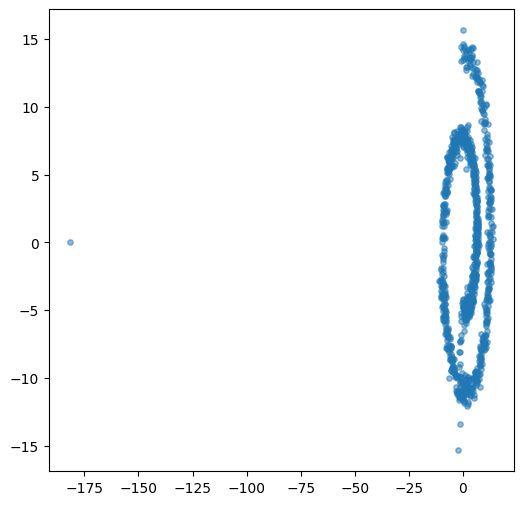

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=[6, 6])
plt.scatter(x[:,0],x[:,1],s=15,alpha=0.5)
#plt.axis('off')
plt.show()
plt.close()